In [2]:
import pandas as pd
df=pd.read_csv("PhoneDatabase3.csv")
df

,Aux. Camera Number of Pixels,Secondary Display Resolution,Aux. 2 Cam. Min. Equiv. Focal Length,Display Hole,Camera Image Sensor,OEM ID,Aux. 3 Camera Image Sensor,Data Integrity,Graphical Controller,Aux. 3 Cam. Min. Equiv. Focal Length,...,Protection against mechanical impacts,Supported BeiDou system (BDS),Number of effective pixels,Expansion Interfaces,Built-in accelerometer,Dedicated Graphics Memory,Secondary Display Pixel Density (dot pitch),Talk Time,Pixel Density,SAR (head)
0,NaN,NaN,NaN,NaN,BSI CMOS,NaN,No,Final,Qualcomm Adreno 619,NaN,...,122 cm,B1I BeiDou receiver,12.0 MP camera,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,50.0 hours,295 PPI,NaN
1,13.0 MP aux. cam,NaN,90 mm,1-hole,BSI CMOS,NaN,Mono CMOS,Final,Qualcomm Adreno 730,NaN,...,NaN,"B1c\n, B1I\n, B2a BeiDou receiver",48.0 MP camera,NM,3D accelerometer,NaN,NaN,NaN,444 PPI,NaN
2,NaN,NaN,NaN,NaN,No,N157bAP,No,Final,NaN,NaN,...,NaN,NaN,NaN,No,Yes,NaN,NaN,1.5 hours,326 PPI,NaN
3,1.9 MP aux. cam,NaN,NaN,NaN,BSI CMOS,NaN,No,Preliminary,ARM Mali-G57MP2,NaN,...,NaN,B1I BeiDou receiver,50.1 MP camera,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,41.0 hours,401 PPI,0.310 W/kg
4,NaN,NaN,NaN,NaN,BSI CMOS,NaN,No,Final,PowerVR GE8320,NaN,...,NaN,B1I BeiDou receiver,13.0 MP camera,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",Yes,NaN,NaN,NaN,270 PPI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,0.1 MP aux. cam,NaN,NaN,NaN,BSI CMOS,NaN,No,Final,ARM Mali-G52MP2,NaN,...,NaN,B1I BeiDou receiver,50.1 MP camera,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,34.0 hours,268 PPI,NaN
3331,12.2 MP aux. cam,NaN,69 mm,1-hole,BSI CMOS,S908UZGFATT,BSI CMOS,Final,Qualcomm Adreno 730,240 mm,...,NaN,NaN,108.0 MP camera,No,3D accelerometer,NaN,NaN,40.0 hours,500 PPI,1.170 W/kg
3332,8.0 MP aux. cam,NaN,NaN,1-hole,BSI CMOS,NaN,Mono CMOS,Final,ARM Mali-G57MP2,NaN,...,NaN,B1I BeiDou receiver,108.0 MP camera,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,33.0 hours,409 PPI,0.594 W/kg
3333,13.0 MP aux. cam,NaN,NaN,1-hole,BSI CMOS,NaN,No,Final,Qualcomm Adreno 660,NaN,...,NaN,B1I BeiDou receiver,48.0 MP camera,No,3D accelerometer,NaN,NaN,NaN,398 PPI,NaN


In [4]:
df.shape

(3335, 143)

In [5]:
df["Brand"]

0         Sharp
1        Huawei
2         Apple
3       Samsung
4           BBK
         ...   
3330     Xiaomi
3331    Samsung
3332     Xiaomi
3333        BBK
3334        BBK
Name: Brand, Length: 3335, dtype: object

In [46]:
df["Market Regions"].value_counts()

Asia                                                                                                                                                                                        1376
North America                                                                                                                                                                                382
Asia\n, Southeast Asia                                                                                                                                                                       193
Africa\n, Asia\n, Australia\n, Central America\n, Eastern Europe\n, Europe\n, Middle East \n, North America\n, Oceania\n, South America\n, Southeast Asia\n, Western Europe\n, Worldwide      91
North America\n, South America                                                                                                                                                                86
                                   

In [43]:
df["Price"]

0       51500.00
1        7998.00
2            NaN
3         199.99
4         149.00
          ...   
3330      199.99
3331     1399.99
3332         NaN
3333     2899.00
3334     1399.00
Name: Price, Length: 3335, dtype: float64

In [48]:
df["Released"]

0       2022 Oct 28
1          2023 Mar
2       2020 Sep 18
3          2023 May
4          2022 May
           ...     
3330       2023 Jan
3331    2022 Feb 26
3332       2022 Mar
3333       2021 Dec
3334       2022 Dec
Name: Released, Length: 3335, dtype: object

In [49]:
df.duplicated().sum()

0

In [47]:
df["Model"].duplicated().sum()

3

In [50]:
from datetime import datetime

In [54]:
for index, row in df.iterrows():
    if pd.isna(row["Secondary Display Type"]):
        df.at[index, "Secondary Display Type"] = False
    else:
        df.at[index, "Secondary Display Type"] = True
    if pd.isna(row["Wireless Charging"]):
        df.at[index, "Wireless Charging"] = False
    else:
        df.at[index, "Wireless Charging"] = True
    if pd.isna(row["IR"]):
        df.at[index, "IR"] = False
    else:
        df.at[index, "IR"] = True
    if pd.isna(row["Touchscreen Type"]):
        df.at[index, "Touchscreen Type"] = False
    else:
        df.at[index, "Touchscreen Type"] = True
    df.at[index, "Number of effective pixels"] = str(df.at[index, "Number of effective pixels"])
    df.at[index, "Number of effective pixels"] = float(df.at[index, "Number of effective pixels"].split(' ')[0])
    if pd.isna(row["Pixel Density"]):
        df.at[index, "Pixel Density"] = 0
    else:
        df.at[index, "Pixel Density"] = int(str(df.at[index, "Pixel Density"]).split(' ')[0])
    df.at[index, "Market Regions"] = str(str(df.at[index, "Market Regions"]))
    df.at[index, "Market Regions"] = df.at[index, "Market Regions"].split('\n')[0]
    df.at[index, "Zoom"] = float(str(df.at[index, "Zoom"]).split(' ')[0])
    if pd.isna(row["Non-volatile Memory Capacity (converted)"]):
        df.at[index, "Non-volatile Memory Capacity (converted)"] = 0
    else:
        df.at[index, "Non-volatile Memory Capacity (converted)"] = int(str(df.at[index, "Non-volatile Memory Capacity (converted)"]).split(' ')[0])
    
    if pd.isna(row["RAM Capacity (converted)"]):
        df.at[index, "RAM Capacity (converted)"] = 0
    else:
        df.at[index, "RAM Capacity (converted)"] = float(str(df.at[index, "RAM Capacity (converted)"]).split(' ')[0])
    
    if pd.isna(row["Nominal Battery Capacity"]):
        df.at[index, "Nominal Battery Capacity"] = 0
    else:
        df.at[index, "Nominal Battery Capacity"] = int(str(df.at[index, "Nominal Battery Capacity"]).split(' ')[0])
    
    df.at[index, "Released"] = ' '.join(str(df.at[index, "Released"]).split()[0:2])
    if pd.isna(row["Released"]):
        df.at[index, "Released"] = 0
    else:
        df.at[index, "Released"] = pd.to_datetime(row["Released"], errors='coerce')
    if pd.isna(row["GPU Clock"]):
        df.at[index, "GPU Clock"] = 0
    else:
        df.at[index, "GPU Clock"] = str(df.at[index, "GPU Clock"])
        df.at[index, "GPU Clock"] = int(df.at[index, "GPU Clock"].split(' ')[0])
    if pd.isna(row["Display Refresh Rate"]):
        df.at[index, "Display Refresh Rate"] = 0
    else:
        df.at[index, "Display Refresh Rate"] = int(str(df.at[index, "Display Refresh Rate"]).split(' ')[0])
    
    if pd.isna(row["CPU Clock"]):
        df.at[index, "CPU Clock"] = 0
    else:
        if not isinstance(df.at[index, "CPU Clock"], int):
            df.at[index, "CPU Clock"] = int(str(df.at[index, "CPU Clock"]).split(' ')[0])
    df.at[index, "Video Recording"] = str(df.at[index, "Video Recording"]).split(' ')[0]
    df.at[index, "Bluetooth"] = str(df.at[index, "Bluetooth"])
    if pd.isna(row["Sec. SIM Card Slot"]):
        df.at[index, "Sec. SIM Card Slot"] = False
    else:
        df.at[index, "Sec. SIM Card Slot"] = True
    df.at[index, "Mass"] = float(str(df.at[index, "Mass"]).split(' ')[0])
    df.at[index, "Depth"] = float(str(df.at[index, "Depth"]).split(' ')[0])
    df.at[index, "Width"] = float(str(df.at[index, "Width"]).split(' ')[0])
    df.at[index, "Height"] = float(str(df.at[index, "Height"]).split(' ')[0])
    df.at[index, "Price"] = float(df.at[index, "Price"])

In [55]:
df

,Aux. Camera Number of Pixels,Secondary Display Resolution,Aux. 2 Cam. Min. Equiv. Focal Length,Display Hole,Camera Image Sensor,OEM ID,Aux. 3 Camera Image Sensor,Data Integrity,Graphical Controller,Aux. 3 Cam. Min. Equiv. Focal Length,...,Protection against mechanical impacts,Supported BeiDou system (BDS),Number of effective pixels,Expansion Interfaces,Built-in accelerometer,Dedicated Graphics Memory,Secondary Display Pixel Density (dot pitch),Talk Time,Pixel Density,SAR (head)
0,NaN,NaN,NaN,NaN,BSI CMOS,NaN,No,Final,Qualcomm Adreno 619,NaN,...,122 cm,B1I BeiDou receiver,12.0,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,50.0 hours,295,NaN
1,13.0 MP aux. cam,NaN,90 mm,1-hole,BSI CMOS,NaN,Mono CMOS,Final,Qualcomm Adreno 730,NaN,...,NaN,"B1c\n, B1I\n, B2a BeiDou receiver",48.0,NM,3D accelerometer,NaN,NaN,NaN,444,NaN
2,NaN,NaN,NaN,NaN,No,N157bAP,No,Final,NaN,NaN,...,NaN,NaN,NaN,No,Yes,NaN,NaN,1.5 hours,326,NaN
3,1.9 MP aux. cam,NaN,NaN,NaN,BSI CMOS,NaN,No,Preliminary,ARM Mali-G57MP2,NaN,...,NaN,B1I BeiDou receiver,50.1,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,41.0 hours,401,0.310 W/kg
4,NaN,NaN,NaN,NaN,BSI CMOS,NaN,No,Final,PowerVR GE8320,NaN,...,NaN,B1I BeiDou receiver,13.0,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",Yes,NaN,NaN,NaN,270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,0.1 MP aux. cam,NaN,NaN,NaN,BSI CMOS,NaN,No,Final,ARM Mali-G52MP2,NaN,...,NaN,B1I BeiDou receiver,50.1,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,34.0 hours,268,NaN
3331,12.2 MP aux. cam,NaN,69 mm,1-hole,BSI CMOS,S908UZGFATT,BSI CMOS,Final,Qualcomm Adreno 730,240 mm,...,NaN,NaN,108.0,No,3D accelerometer,NaN,NaN,40.0 hours,500,1.170 W/kg
3332,8.0 MP aux. cam,NaN,NaN,1-hole,BSI CMOS,NaN,Mono CMOS,Final,ARM Mali-G57MP2,NaN,...,NaN,B1I BeiDou receiver,108.0,"TransFlash\n, microSD\n, microSDHC\n, microSDXC",3D accelerometer,NaN,NaN,33.0 hours,409,0.594 W/kg
3333,13.0 MP aux. cam,NaN,NaN,1-hole,BSI CMOS,NaN,No,Final,Qualcomm Adreno 660,NaN,...,NaN,B1I BeiDou receiver,48.0,No,3D accelerometer,NaN,NaN,NaN,398,NaN


In [9]:
# Assuming df is your DataFrame
df = df[df['Device Category'] != 'Smartwatch']


In [10]:
columns_of_interest = ["Model",
    "Secondary Display Type", "Wireless Charging", "Platform", "Device Category",
    "Brand", "Touchscreen Type", "CPU", "Number of effective pixels", "Resolution",
    "Pixel Density", "Market Regions", "Zoom", "Display Type",
    "Non-volatile Memory Capacity (converted)", "IR", "RAM Capacity (converted)",
    "Nominal Battery Capacity", "Released", "GPU Clock",
    "Display Refresh Rate", "CPU Clock", "Video Recording",
    "Bluetooth", "Sec. SIM Card Slot", "Mass", "Depth",
    "Width", "Height", "Price", "currency"
]

# Tạo DataFrame mới chỉ chứa các cột bạn quan tâm
selected_columns_df = df[columns_of_interest]

selected_columns_df

,Model,Secondary Display Type,Wireless Charging,Platform,Device Category,Brand,Touchscreen Type,CPU,Number of effective pixels,Resolution,...,CPU Clock,Video Recording,Bluetooth,Sec. SIM Card Slot,Mass,Depth,Width,Height,Price,currency
0,Basio active 5G TD-LTE JP 64GB SHG09,NaN,NaN,Android,Smartphone,Sharp,Capacitive multi-touch screen,"Qualcomm Snapdragon 695 5G SM6375, 2021, 64 bi...",12.0 MP camera,720x1520,...,2200 MHz,1920x1080 pixel,Bluetooth 5.1,NaN,174 g,9.4 mm,71 mm,158 mm,51500.00,JPY
1,P60 Pro 4G Premium Edition Dual SIM TD-LTE CN ...,NaN,"Qi\n, Qi reverse",Android,Smartphone,Huawei,Capacitive multi-touch screen,Qualcomm Snapdragon 8+ Gen 1 4G SM8475 (Palima...,48.0 MP camera,1220x2700,...,3190 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),200 g,8.3 mm,74.5 mm,161 mm,7998.00,CNY
3,SM-A146U Galaxy A14 5G 2023 Standard Edition T...,NaN,NaN,Android,Smartphone,Samsung,Capacitive multi-touch screen,"MediaTek Dimensity 700 MT6833V/ZA, 2020, 64 bi...",50.1 MP camera,1080x2408,...,2200 MHz,1920x1080 pixel,Bluetooth 5.2,NaN,204 g,9.1 mm,78 mm,167.7 mm,199.99,USD
4,Vivo Y01 2022 Premium Edition Dual SIM TD-LTE ...,NaN,NaN,Android,Smartphone,BBK,Capacitive multi-touch screen,"MediaTek Helio P35 MT6765, 2018, 64 bit, octa-...",13.0 MP camera,720x1600,...,2300 MHz,NaN,Bluetooth 5.0,Nano-SIM (4FF),178 g,8.28 mm,75.2 mm,163.96 mm,149.00,EUR
5,Realme 9 Pro+ 5G 2022 Premium Edition Dual SIM...,NaN,NaN,Android,Smartphone,Oppo,Capacitive multi-touch screen,"MediaTek Dimensity 920 MT6877V/TZA, 2022, 64 b...",50.3 MP camera,1080x2400,...,2500 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),182 g,7.99 mm,73.3 mm,160.2 mm,26999.00,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Redmi 12C NFC Premium Edition Global Dual SIM ...,NaN,NaN,Android,Smartphone,Xiaomi,Capacitive multi-touch screen,"MediaTek Helio G85 MT6769Z, 2020, 64 bit, octa...",50.1 MP camera,720x1650,...,2000 MHz,1920x1080 pixel,Bluetooth 5.1,Nano-SIM (4FF),192 g,8.77 mm,76.41 mm,168.76 mm,199.99,EUR
3331,SM-S908U Galaxy S22 Ultra 5G UW Dual SIM TD-LT...,NaN,"PMA\n, Qi",Android,Smartphone,Samsung,Capacitive multi-touch screen,Qualcomm Snapdragon 8 Gen 1 5G SM8450 (Waipio)...,108.0 MP camera,1440x3088,...,2995 MHz,7680x4320 pixel,Bluetooth 5.2,Nano-SIM (4FF),229 g,8.9 mm,77.9 mm,163.3 mm,1399.99,USD
3332,Redmi Note 11S 4G Standard Edition Dual SIM TD...,NaN,NaN,Android,Smartphone,Xiaomi,Capacitive multi-touch screen,"MediaTek Helio G96 MT6781V/CD, 2021, 64 bit, o...",108.0 MP camera,1080x2400,...,2050 MHz,1920x1080 pixel,Bluetooth 5.0,Nano-SIM (4FF),179 g,8.09 mm,73.87 mm,159.87 mm,NaN,NaN
3333,vivo iQOO Neo 5S 5G Standard Edition Dual SIM ...,NaN,NaN,Android,Smartphone,BBK,Capacitive multi-touch screen,"Qualcomm Snapdragon 888 5G SM8350 (Lahaina), 2...",48.0 MP camera,1080x2400,...,2842 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),197 g,8.39 mm,76.4 mm,163.22 mm,2899.00,CNY


In [11]:
selected_columns_df.duplicated(subset=["Model",
    "Secondary Display Type", "Wireless Charging", "Platform", "Device Category",
    "Brand", "Touchscreen Type", "CPU", "Number of effective pixels", "Resolution",
    "Pixel Density", "Market Regions", "Zoom", "Display Type",
    "Non-volatile Memory Capacity (converted)", "IR", "RAM Capacity (converted)",
    "Nominal Battery Capacity", "Released", "GPU Clock",
    "Display Refresh Rate", "CPU Clock", "Video Recording",
    "Bluetooth", "Sec. SIM Card Slot", "Mass", "Depth",
    "Width", "Height",
]).sum()

0

In [12]:
selected_columns_df.drop_duplicates(subset=["Model",
    "Secondary Display Type", "Wireless Charging", "Platform", "Device Category",
    "Brand", "Touchscreen Type", "CPU", "Number of effective pixels", "Resolution",
    "Pixel Density", "Market Regions", "Zoom", "Display Type",
    "Non-volatile Memory Capacity (converted)", "IR", "RAM Capacity (converted)",
    "Nominal Battery Capacity", "Released", "GPU Clock",
    "Display Refresh Rate", "CPU Clock", "Video Recording",
    "Bluetooth", "Sec. SIM Card Slot", "Mass", "Depth",
    "Width", "Height",
], inplace=True)
selected_columns_df

C:\Users\MinhHoang\AppData\Local\Temp\ipykernel_19564\895697894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df.drop_duplicates(subset=["Model",


,Model,Secondary Display Type,Wireless Charging,Platform,Device Category,Brand,Touchscreen Type,CPU,Number of effective pixels,Resolution,...,CPU Clock,Video Recording,Bluetooth,Sec. SIM Card Slot,Mass,Depth,Width,Height,Price,currency
0,Basio active 5G TD-LTE JP 64GB SHG09,NaN,NaN,Android,Smartphone,Sharp,Capacitive multi-touch screen,"Qualcomm Snapdragon 695 5G SM6375, 2021, 64 bi...",12.0 MP camera,720x1520,...,2200 MHz,1920x1080 pixel,Bluetooth 5.1,NaN,174 g,9.4 mm,71 mm,158 mm,51500.00,JPY
1,P60 Pro 4G Premium Edition Dual SIM TD-LTE CN ...,NaN,"Qi\n, Qi reverse",Android,Smartphone,Huawei,Capacitive multi-touch screen,Qualcomm Snapdragon 8+ Gen 1 4G SM8475 (Palima...,48.0 MP camera,1220x2700,...,3190 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),200 g,8.3 mm,74.5 mm,161 mm,7998.00,CNY
3,SM-A146U Galaxy A14 5G 2023 Standard Edition T...,NaN,NaN,Android,Smartphone,Samsung,Capacitive multi-touch screen,"MediaTek Dimensity 700 MT6833V/ZA, 2020, 64 bi...",50.1 MP camera,1080x2408,...,2200 MHz,1920x1080 pixel,Bluetooth 5.2,NaN,204 g,9.1 mm,78 mm,167.7 mm,199.99,USD
4,Vivo Y01 2022 Premium Edition Dual SIM TD-LTE ...,NaN,NaN,Android,Smartphone,BBK,Capacitive multi-touch screen,"MediaTek Helio P35 MT6765, 2018, 64 bit, octa-...",13.0 MP camera,720x1600,...,2300 MHz,NaN,Bluetooth 5.0,Nano-SIM (4FF),178 g,8.28 mm,75.2 mm,163.96 mm,149.00,EUR
5,Realme 9 Pro+ 5G 2022 Premium Edition Dual SIM...,NaN,NaN,Android,Smartphone,Oppo,Capacitive multi-touch screen,"MediaTek Dimensity 920 MT6877V/TZA, 2022, 64 b...",50.3 MP camera,1080x2400,...,2500 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),182 g,7.99 mm,73.3 mm,160.2 mm,26999.00,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Redmi 12C NFC Premium Edition Global Dual SIM ...,NaN,NaN,Android,Smartphone,Xiaomi,Capacitive multi-touch screen,"MediaTek Helio G85 MT6769Z, 2020, 64 bit, octa...",50.1 MP camera,720x1650,...,2000 MHz,1920x1080 pixel,Bluetooth 5.1,Nano-SIM (4FF),192 g,8.77 mm,76.41 mm,168.76 mm,199.99,EUR
3331,SM-S908U Galaxy S22 Ultra 5G UW Dual SIM TD-LT...,NaN,"PMA\n, Qi",Android,Smartphone,Samsung,Capacitive multi-touch screen,Qualcomm Snapdragon 8 Gen 1 5G SM8450 (Waipio)...,108.0 MP camera,1440x3088,...,2995 MHz,7680x4320 pixel,Bluetooth 5.2,Nano-SIM (4FF),229 g,8.9 mm,77.9 mm,163.3 mm,1399.99,USD
3332,Redmi Note 11S 4G Standard Edition Dual SIM TD...,NaN,NaN,Android,Smartphone,Xiaomi,Capacitive multi-touch screen,"MediaTek Helio G96 MT6781V/CD, 2021, 64 bit, o...",108.0 MP camera,1080x2400,...,2050 MHz,1920x1080 pixel,Bluetooth 5.0,Nano-SIM (4FF),179 g,8.09 mm,73.87 mm,159.87 mm,NaN,NaN
3333,vivo iQOO Neo 5S 5G Standard Edition Dual SIM ...,NaN,NaN,Android,Smartphone,BBK,Capacitive multi-touch screen,"Qualcomm Snapdragon 888 5G SM8350 (Lahaina), 2...",48.0 MP camera,1080x2400,...,2842 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),197 g,8.39 mm,76.4 mm,163.22 mm,2899.00,CNY


In [89]:
selected_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335 entries, 0 to 3334
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Model                                     3335 non-null   object 
 1   Secondary Display Type                    3335 non-null   object 
 2   Wireless Charging                         3335 non-null   object 
 3   Platform                                  3335 non-null   object 
 4   Device Category                           3335 non-null   object 
 5   Brand                                     3335 non-null   object 
 6   Touchscreen Type                          3335 non-null   object 
 7   CPU                                       3335 non-null   object 
 8   Number of effective pixels                3239 non-null   object 
 9   Resolution                                3335 non-null   object 
 10  Pixel Density                       

In [90]:
import seaborn as sns 


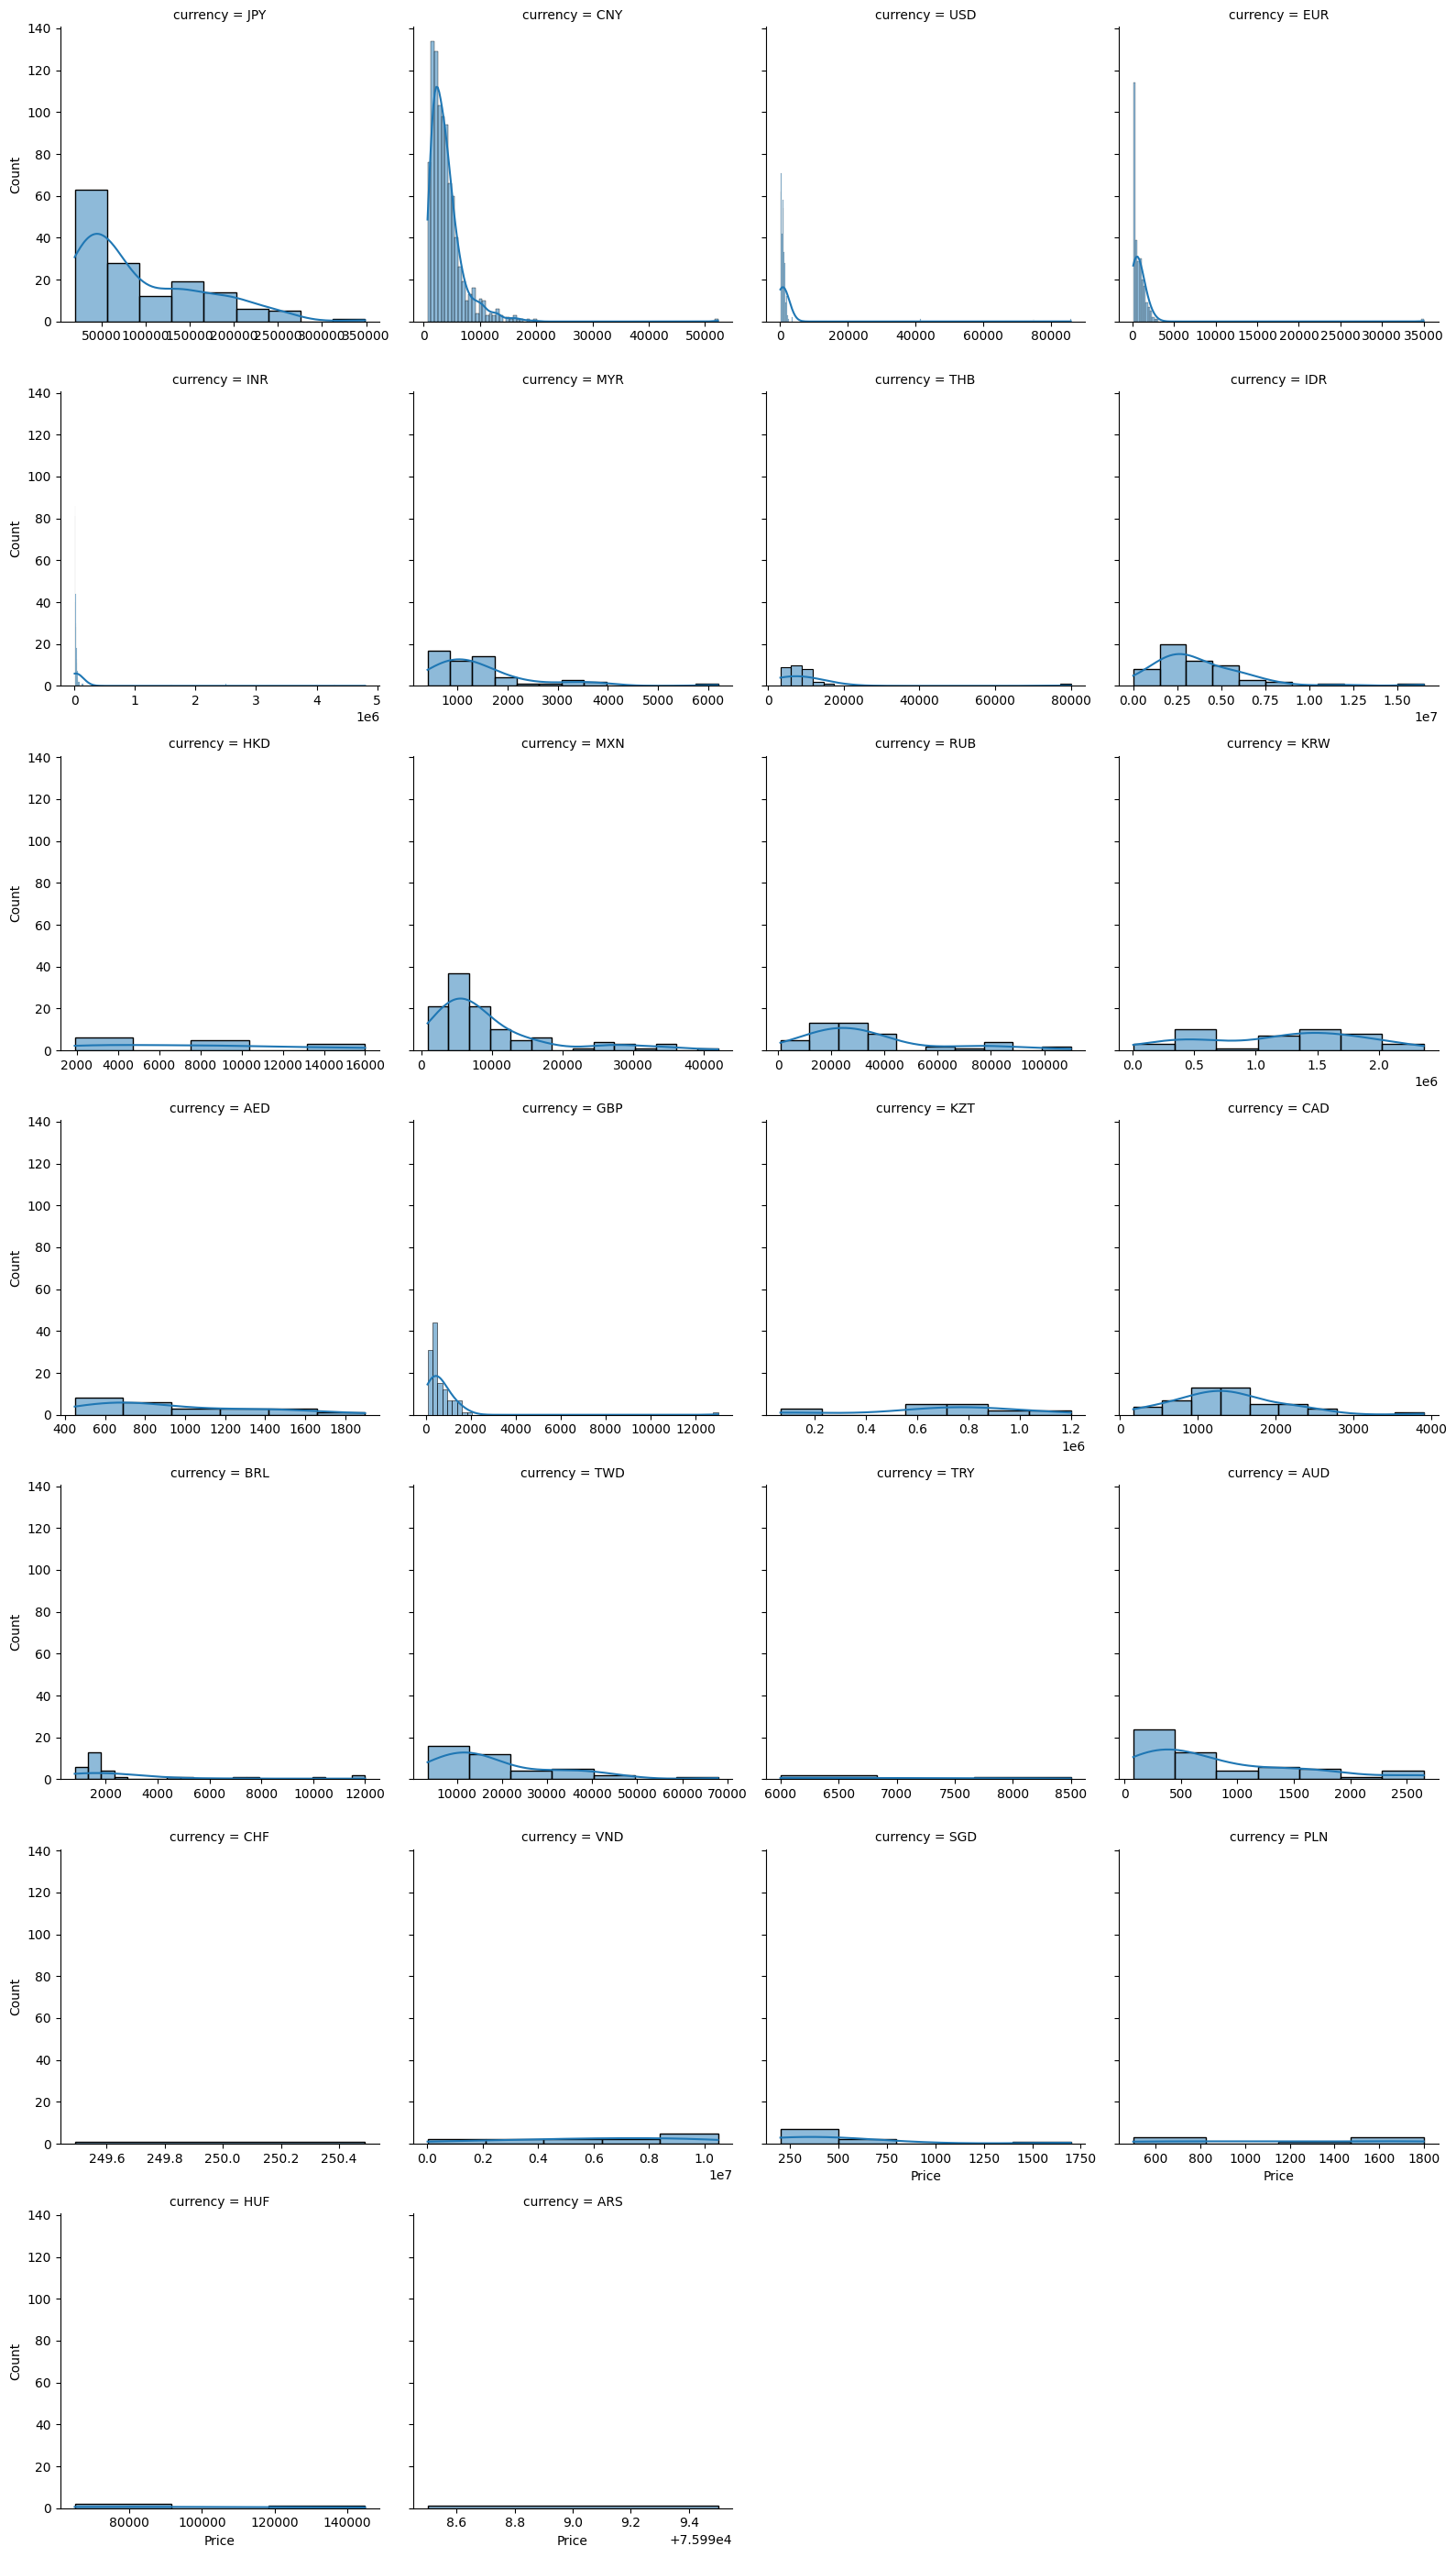

In [96]:
import matplotlib.pyplot as plt

# Create a FacetGrid for each currency
g = sns.FacetGrid(selected_columns_df, col="currency", col_wrap=4, height=4, sharex=False)

# Map the displot onto the FacetGrid
g.map(sns.histplot, "Price", kde=True)

# Show the plots
plt.show()


In [111]:
unique_currencies = selected_columns_df['currency'].unique()

print(unique_currencies)

['JPY' 'CNY' nan 'USD' 'EUR' 'INR' 'MYR' 'THB' 'IDR' 'HKD' 'MXN' 'RUB'
 'KRW' 'AED' 'GBP' 'KZT' 'CAD' 'BRL' 'TWD' 'TRY' 'AUD' 'CHF' 'VND' 'SGD'
 'PLN' 'HUF' 'ARS']


In [14]:

exchange_rates = {'JPY': 0.0091, 'CNY': 0.1572, 'USD': 1.0, 'EUR': 1.1845, 'INR': 0.0134, 'MYR': 0.2409, 'THB': 0.0306, 'IDR': 0.0000712, 'HKD': 0.1284, 'MXN': 0.0496, 'RUB': 0.0136,
                  'KRW': 0.000887, 'AED': 0.2723, 'GBP': 1.3841, 'KZT': 0.0023, 'CAD': 0.8012, 'BRL': 0.1862, 'TWD': 0.0357, 'TRY': 0.1104, 'AUD': 0.7388, 'CHF': 1.0964, 'VND': 0.0000435,
                  'SGD': 0.7423, 'PLN': 0.2605, 'HUF': 0.0033, 'ARS': 0.0098}

selected_columns_df['Exchange Rate'] = selected_columns_df['currency'].map(exchange_rates)

selected_columns_df['Price'] = selected_columns_df['Price'] * selected_columns_df['Exchange Rate']


selected_columns_df = selected_columns_df.drop('Exchange Rate', axis=1)
selected_columns_df["currency"]="USD"


C:\Users\MinhHoang\AppData\Local\Temp\ipykernel_19564\135446445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['Exchange Rate'] = selected_columns_df['currency'].map(exchange_rates)
C:\Users\MinhHoang\AppData\Local\Temp\ipykernel_19564\135446445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['Price'] = selected_columns_df['Price'] * selected_columns_df['Exchange Rate']


In [15]:
selected_columns_df

,Model,Secondary Display Type,Wireless Charging,Platform,Device Category,Brand,Touchscreen Type,CPU,Number of effective pixels,Resolution,...,CPU Clock,Video Recording,Bluetooth,Sec. SIM Card Slot,Mass,Depth,Width,Height,Price,currency
0,Basio active 5G TD-LTE JP 64GB SHG09,NaN,NaN,Android,Smartphone,Sharp,Capacitive multi-touch screen,"Qualcomm Snapdragon 695 5G SM6375, 2021, 64 bi...",12.0 MP camera,720x1520,...,2200 MHz,1920x1080 pixel,Bluetooth 5.1,NaN,174 g,9.4 mm,71 mm,158 mm,468.650000,USD
1,P60 Pro 4G Premium Edition Dual SIM TD-LTE CN ...,NaN,"Qi\n, Qi reverse",Android,Smartphone,Huawei,Capacitive multi-touch screen,Qualcomm Snapdragon 8+ Gen 1 4G SM8475 (Palima...,48.0 MP camera,1220x2700,...,3190 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),200 g,8.3 mm,74.5 mm,161 mm,1257.285600,USD
3,SM-A146U Galaxy A14 5G 2023 Standard Edition T...,NaN,NaN,Android,Smartphone,Samsung,Capacitive multi-touch screen,"MediaTek Dimensity 700 MT6833V/ZA, 2020, 64 bi...",50.1 MP camera,1080x2408,...,2200 MHz,1920x1080 pixel,Bluetooth 5.2,NaN,204 g,9.1 mm,78 mm,167.7 mm,199.990000,USD
4,Vivo Y01 2022 Premium Edition Dual SIM TD-LTE ...,NaN,NaN,Android,Smartphone,BBK,Capacitive multi-touch screen,"MediaTek Helio P35 MT6765, 2018, 64 bit, octa-...",13.0 MP camera,720x1600,...,2300 MHz,NaN,Bluetooth 5.0,Nano-SIM (4FF),178 g,8.28 mm,75.2 mm,163.96 mm,176.490500,USD
5,Realme 9 Pro+ 5G 2022 Premium Edition Dual SIM...,NaN,NaN,Android,Smartphone,Oppo,Capacitive multi-touch screen,"MediaTek Dimensity 920 MT6877V/TZA, 2022, 64 b...",50.3 MP camera,1080x2400,...,2500 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),182 g,7.99 mm,73.3 mm,160.2 mm,361.786600,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Redmi 12C NFC Premium Edition Global Dual SIM ...,NaN,NaN,Android,Smartphone,Xiaomi,Capacitive multi-touch screen,"MediaTek Helio G85 MT6769Z, 2020, 64 bit, octa...",50.1 MP camera,720x1650,...,2000 MHz,1920x1080 pixel,Bluetooth 5.1,Nano-SIM (4FF),192 g,8.77 mm,76.41 mm,168.76 mm,236.888155,USD
3331,SM-S908U Galaxy S22 Ultra 5G UW Dual SIM TD-LT...,NaN,"PMA\n, Qi",Android,Smartphone,Samsung,Capacitive multi-touch screen,Qualcomm Snapdragon 8 Gen 1 5G SM8450 (Waipio)...,108.0 MP camera,1440x3088,...,2995 MHz,7680x4320 pixel,Bluetooth 5.2,Nano-SIM (4FF),229 g,8.9 mm,77.9 mm,163.3 mm,1399.990000,USD
3332,Redmi Note 11S 4G Standard Edition Dual SIM TD...,NaN,NaN,Android,Smartphone,Xiaomi,Capacitive multi-touch screen,"MediaTek Helio G96 MT6781V/CD, 2021, 64 bit, o...",108.0 MP camera,1080x2400,...,2050 MHz,1920x1080 pixel,Bluetooth 5.0,Nano-SIM (4FF),179 g,8.09 mm,73.87 mm,159.87 mm,NaN,USD
3333,vivo iQOO Neo 5S 5G Standard Edition Dual SIM ...,NaN,NaN,Android,Smartphone,BBK,Capacitive multi-touch screen,"Qualcomm Snapdragon 888 5G SM8350 (Lahaina), 2...",48.0 MP camera,1080x2400,...,2842 MHz,3840x2160 pixel,Bluetooth 5.2,Nano-SIM (4FF),197 g,8.39 mm,76.4 mm,163.22 mm,455.722800,USD


In [119]:
def countplot(column, xlabel, ylabel, title):
    plt.figure(figsize = (18,7))
    plot = sns.countplot(x= column, data = selected_columns_df)
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

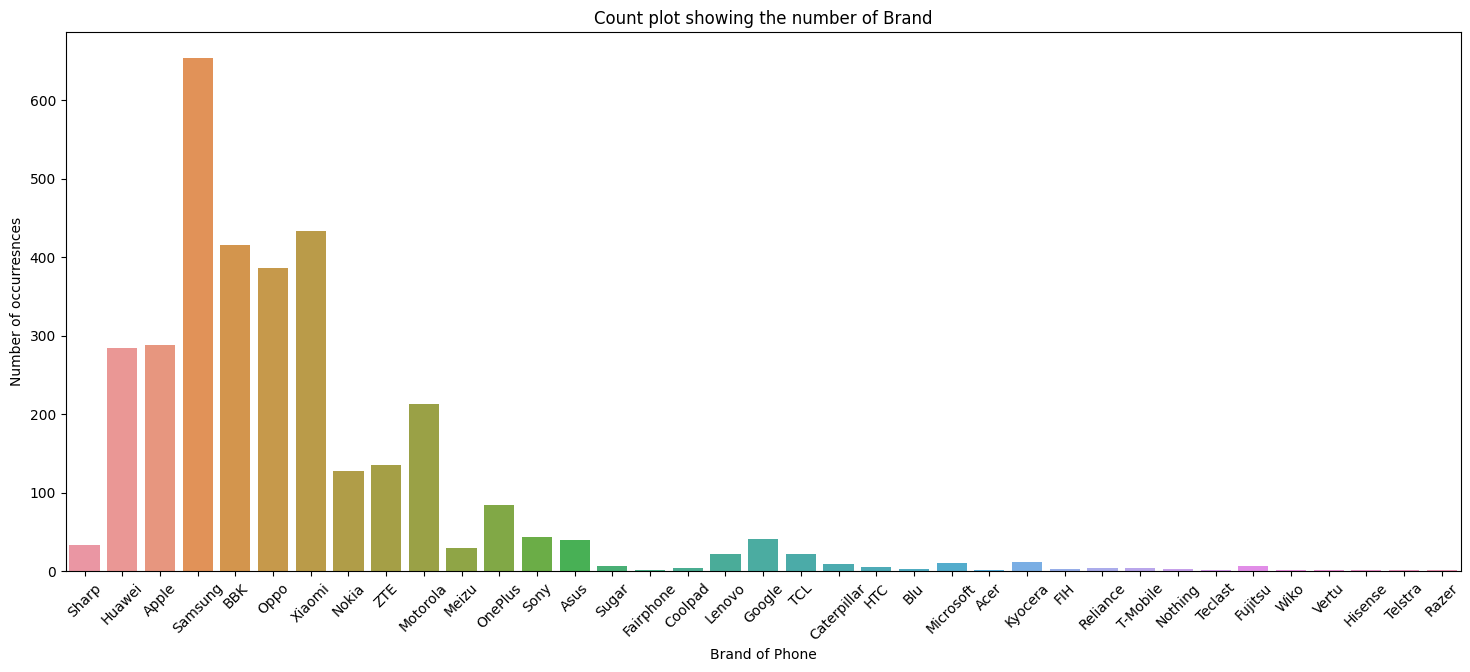

In [120]:
countplot('Brand', 'Brand of Phone', 'Number of occurresnces', 'Count plot showing the number of Brand')

d:\SETUP\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
d:\SETUP\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
d:\SETUP\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
d:\SETUP\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Sharp'),
  Text(1, 0, 'Huawei'),
  Text(2, 0, 'Apple'),
  Text(3, 0, 'Samsung'),
  Text(4, 0, 'BBK'),
  Text(5, 0, 'Oppo'),
  Text(6, 0, 'Xiaomi'),
  Text(7, 0, 'Nokia'),
  Text(8, 0, 'ZTE'),
  Text(9, 0, 'Motorola'),
  Text(10, 0, 'Meizu'),
  Text(11, 0, 'OnePlus'),
  Text(12, 0, 'Sony'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Sugar'),
  Text(15, 0, 'Fairphone'),
  Text(16, 0, 'Coolpad'),
  Text(17, 0, 'Lenovo'),
  Text(18, 0, 'Google'),
  Text(19, 0, 'TCL'),
  Text(20, 0, 'Caterpillar'),
  Text(21, 0, 'HTC'),
  Text(22, 0, 'Blu'),
  Text(23, 0, 'Microsoft'),
  Text(24, 0, 'Acer'),
  Text(25, 0, 'Kyocera'),
  Text(26, 0, 'FIH'),
  Text(27, 0, 'Reliance'),
  Text(28, 0, 'T-Mobile'),
  Text(29, 0, 'Nothing'),
  Text(30, 0, 'Teclast'),
  Text(31, 0, 'Fujitsu'),
  Text(32, 0, 'Wiko'),
  Text(33, 0, 'Vertu

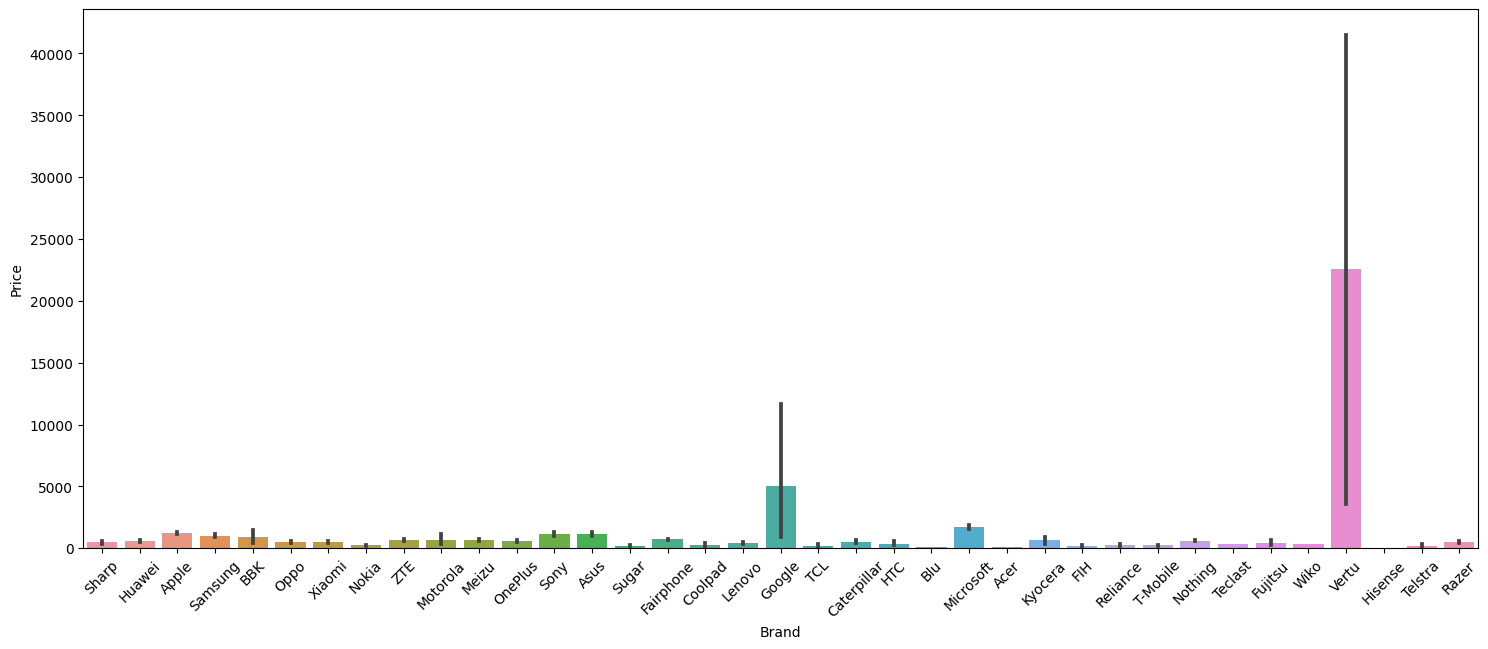

In [121]:
plt.figure(figsize = (18,7))
plot=sns.barplot(x= selected_columns_df['Brand'], y = selected_columns_df['Price'])
plt.xticks(rotation=45)


<AxesSubplot:>

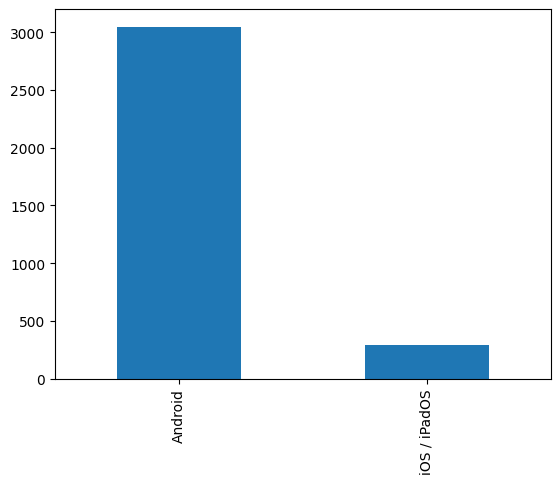

In [122]:
selected_columns_df["Platform"].value_counts().plot(kind="bar")

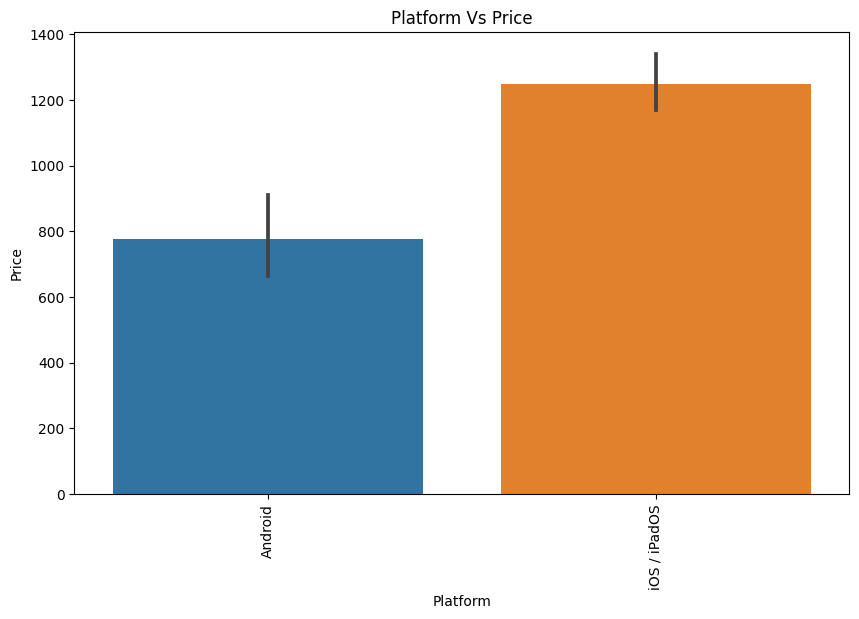

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(x = selected_columns_df['Platform'], y= selected_columns_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Platform Vs Price')
plt.show()

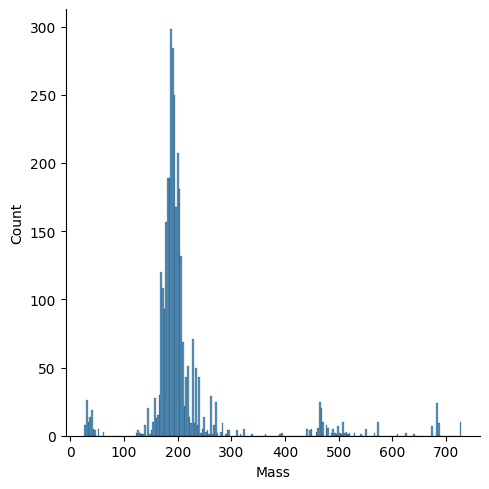

In [124]:
sns.displot(selected_columns_df["Mass"])

<AxesSubplot:xlabel='Mass', ylabel='Price'>

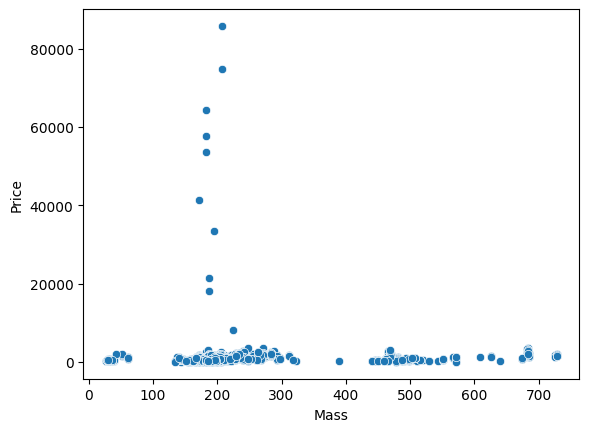

In [125]:
sns.scatterplot(x= selected_columns_df['Mass'], y = selected_columns_df['Price'])

In [126]:
selected_columns_df["Resolution"].value_counts()

1080x2400    867
720x1600     465
1080x2408    230
1080x2340    180
1080x2412    116
            ... 
402x476        1
1440x3040      1
1080x2300      1
1080x1980      1
1280x800       1
Name: Resolution, Length: 96, dtype: int64